Scanning for data in: /Users/ktgiahieu/Documents/review-assistant/AnalyzeMetareviews/metareviews
--- Loaded Data Structure ---
-----------------------------

Processing detailed model-venue data...
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: ICLR2024
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: ICLR2025
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: ICML2024
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: ICML2025
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: NeurIPS2021
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: NeurIPS2022
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: NeurIPS2023
 - Analyzing model: Llama-4-Maverick-17B-128E-Instruct-FP8 for venue: NeurIPS2024
 - Analyzing model: gpt-4o-2024-11-20 for venue: ICLR2024
 - Analyzing model: gpt-4o-2024-11-20 for venue: ICLR2025
 - Analyzing model: gpt-4o-2024-11-20 for 

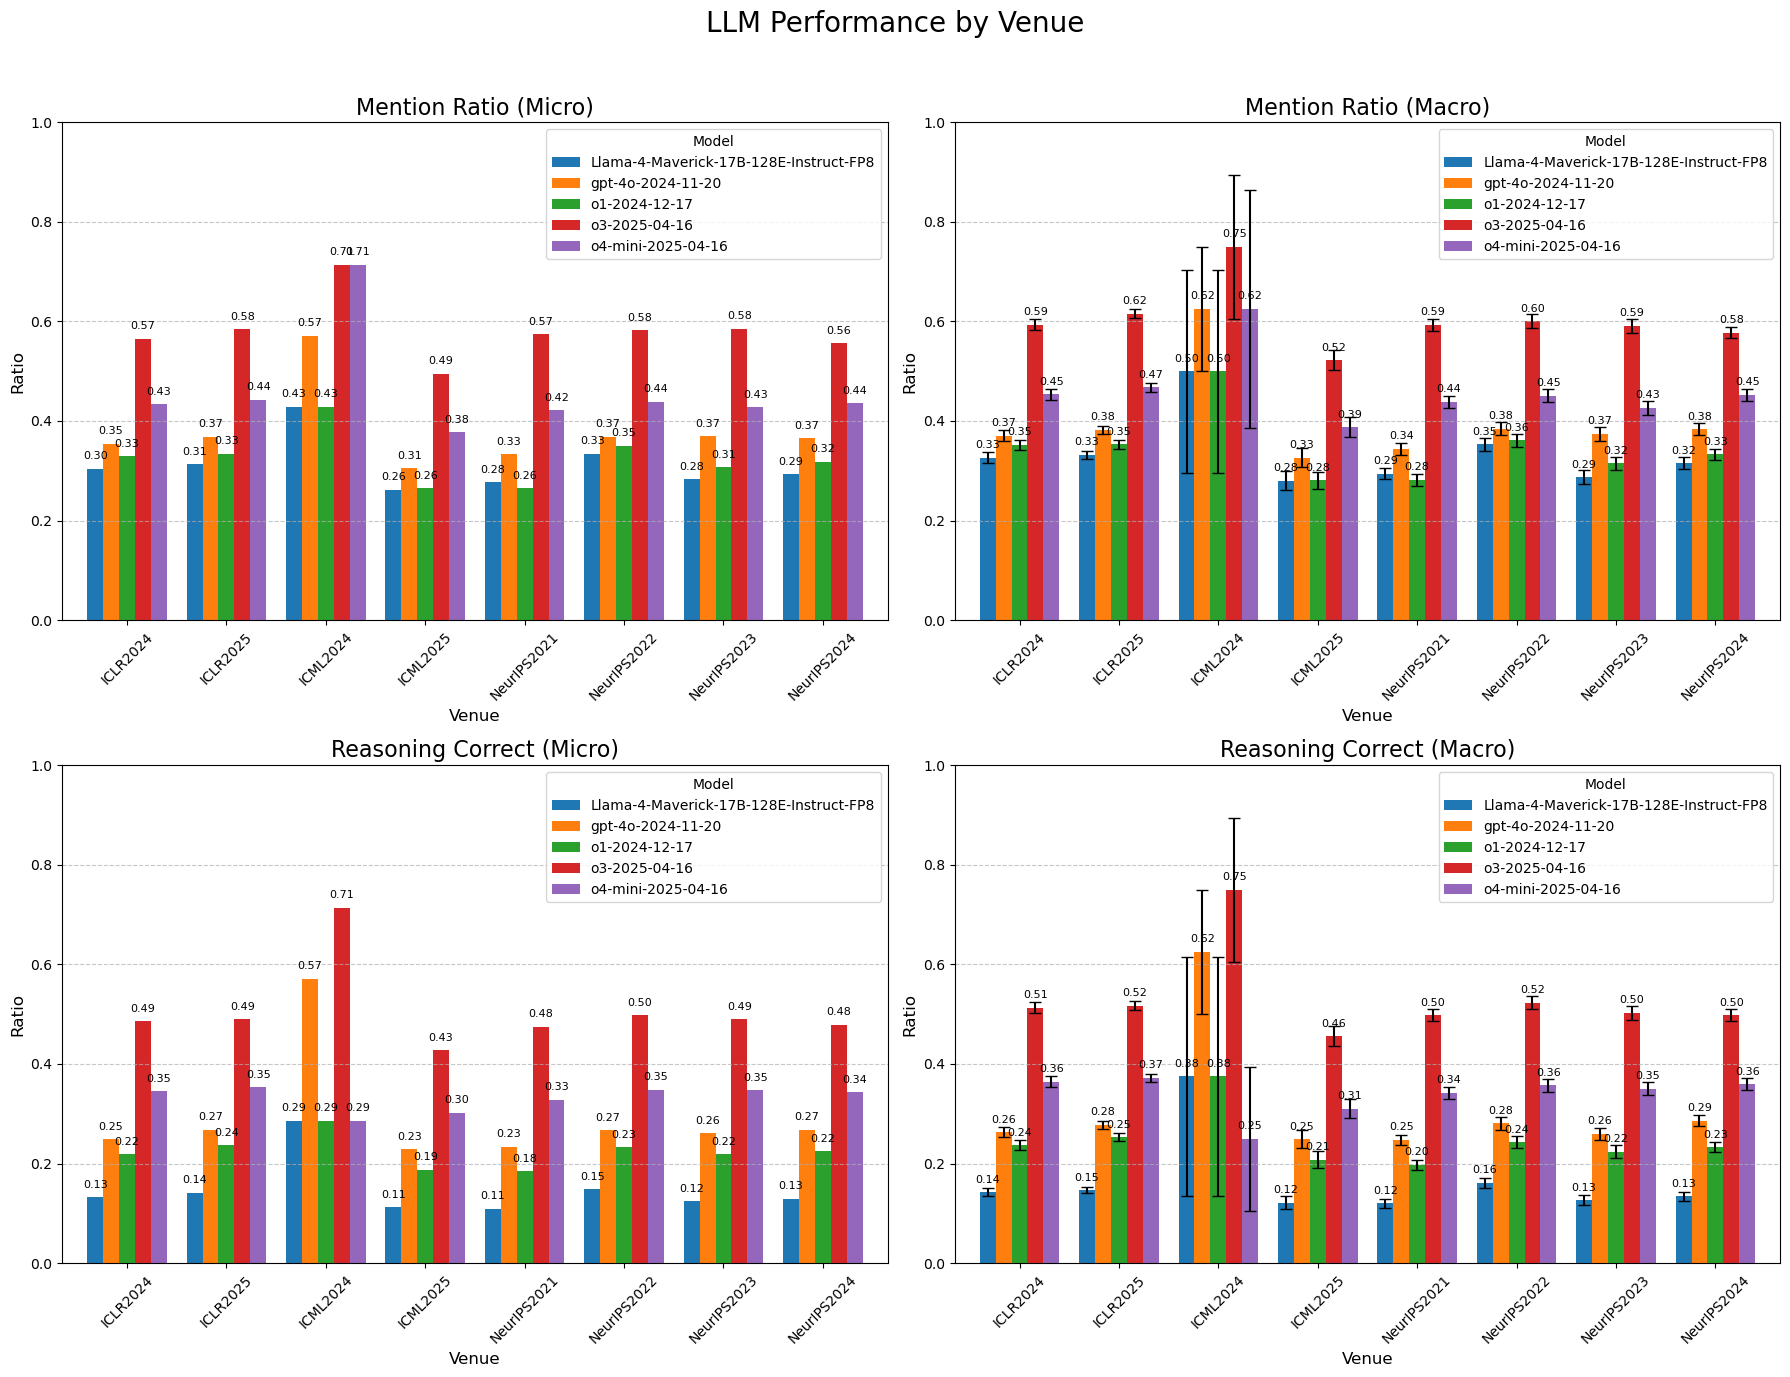

In [ ]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# --- 1. DATA LOADING AND PARSING ---
# We'll simulate loading the data you provided.
# In a real scenario, you would replace this with code that reads files from a directory.

# Example Checklist Data
checklist_data_raw = {
  "0aR1s9YxoL_2310_07418": {
    "paper_title": "Revisiting Plasticity in Visual Reinforcement Learning: Data, Modules and Training Stages",
    "checklists": [
      {
        "section_title": "A. Compliance",
        "items": [
          {"question_id": "A1", "answer": "No"}, {"question_id": "A2", "answer": "No"},
          {"question_id": "A3", "answer": "NA"}, {"question_id": "A4", "answer": "No"},
          {"question_id": "A5", "answer": "Yes"}, {"question_id": "A6", "answer": "No"},
          {"question_id": "A7", "answer": "NA"}, {"question_id": "A8", "answer": "NA"},
          {"question_id": "A9", "answer": "NA"}, {"question_id": "A10", "answer": "NA"},
          {"question_id": "A11", "answer": "NA"}, {"question_id": "A12", "answer": "NA"},
          {"question_id": "A13", "answer": "NA"}, {"question_id": "A14", "answer": "NA"},
          {"question_id": "A15", "answer": "Yes"}, {"question_id": "A16", "answer": "NA"},
          {"question_id": "A17", "answer": "Yes"}, {"question_id": "A18", "answer": "No"},
          {"question_id": "A19", "answer": "No"}, {"question_id": "A20", "answer": "NA"},
          {"question_id": "A21", "answer": "NA"}, {"question_id": "A22", "answer": "No"},
          {"question_id": "A23", "answer": "No"}, {"question_id": "A24", "answer": "Yes"},
          {"question_id": "A25", "answer": "Yes"}, {"question_id": "A26", "answer": "No"},
          {"question_id": "A27", "answer": "Unknown"}, {"question_id": "A28", "answer": "NA"},
          {"question_id": "A29", "answer": "NA"}, {"question_id": "A30", "answer": "Unknown"},
          {"question_id": "A31", "answer": "Yes"}, {"question_id": "A32", "answer": "Yes"},
          {"question_id": "A33", "answer": "Yes"}, {"question_id": "A34", "answer": "Yes"},
          {"question_id": "A35", "answer": "Yes"}, {"question_id": "A36", "answer": "NA"}
        ]
      },
      {
        "section_title": "B. Contribution",
        "items": [
          {"question_id": "B1", "answer": "Yes"}, {"question_id": "B2", "answer": "Yes"},
          {"question_id": "B3", "answer": "Yes"}, {"question_id": "B4", "answer": "Yes"},
          {"question_id": "B5", "answer": "No"}, {"question_id": "B6", "answer": "Yes"},
          {"question_id": "B7", "answer": "Yes"}, {"question_id": "B8", "answer": "Yes"},
          {"question_id": "B9", "answer": "NA"}, {"question_id": "B10", "answer": "Yes"},
          {"question_id": "B11", "answer": "Yes"}, {"question_id": "B12", "answer": "Yes"},
          {"question_id": "B13", "answer": "Yes"}, {"question_id": "B14", "answer": "Unknown"},
          {"question_id": "B15", "answer": "No"}, {"question_id": "B16", "answer": "Yes"},
          {"question_id": "B17", "answer": "Yes"}, {"question_id": "B18", "answer": "Yes"},
          {"question_id": "B19", "answer": "NA"}, {"question_id": "B20", "answer": "NA"},
          {"question_id": "B21", "answer": "No"}, {"question_id": "B22", "answer": "No"},
          {"question_id": "B23", "answer": "NA"}, {"question_id": "B24", "answer": "Yes"},
          {"question_id": "B25", "answer": "No"}, {"question_id": "B26", "answer": "No"},
          {"question_id": "B27", "answer": "No"}, {"question_id": "B28", "answer": "Yes"},
          {"question_id": "B29", "answer": "No"}, {"question_id": "B30", "answer": "Yes"},
          {"question_id": "B31", "answer": "No"}, {"question_id": "B32", "answer": "No"},
          {"question_id": "B33", "answer": "Yes"}, {"question_id": "B34", "answer": "NA"},
          {"question_id": "B35", "answer": "Yes"}, {"question_id": "B36", "answer": "Yes"},
          {"question_id": "B37", "answer": "Yes"}, {"question_id": "B38", "answer": "Yes"},
          {"question_id": "B39", "answer": "NA"}, {"question_id": "B40", "answer": "Yes"},
          {"question_id": "B41", "answer": "Yes"}, {"question_id": "B42", "answer": "Unknown"},
          {"question_id": "B43", "answer": "Unknown"}
        ]
      },
      {
          "section_title": "C. Soundness",
          "items": [{"answer": "NA"}] * 9 + [{"answer": "Yes"}] * 4 + [{"answer": "NA"}] * 2 + [{"answer": "Yes"}] * 2 + [{"answer": "NA"}] + [{"answer": "Yes"}] * 10 + [{"answer": "No"}] + [{"answer": "Yes"}] * 9
      },
      {
          "section_title": "D. Presentation",
          "items": [{"answer": "Yes"}] * 12 + [{"answer": "No"}] + [{"answer": "Yes"}] * 11 + [{"answer": "No"}] * 2 + [{"answer": "Yes"}] + [{"answer": "No"}] + [{"answer": "Yes"}] * 4
      }
    ]
  }
}

# Example Meta Review Data
meta_review_data_raw = {
  "0aR1s9YxoL_2310_07418": [
    {"flaw_id": "redo_baseline_absent", "is_flaw_mentioned": False},
    {"flaw_id": "limited_domain_scope", "is_flaw_mentioned": False},
    # Let's add more flaws for a more interesting analysis
    {"flaw_id": "causality_vs_correlation", "is_flaw_mentioned": True},
    {"flaw_id": "weak_statistical_support", "is_flaw_mentioned": True},
    {"flaw_id": "compute_cost_ignored", "is_flaw_mentioned": False}
  ]
}

# Example Individual Reviews
# We'll create two mock reviews to compare
review_1_raw = {
  "summary": "A solid paper with minor weaknesses.",
  "strengths_and_weaknesses": "### Weaknesses\n* Conceptual framing partly rediscovered.\n* FAU as the sole plasticity proxy.",
  "soundness": 3, "presentation": 3, "contribution": 3, "overall_score": 5, "confidence": 4
}

review_2_raw = {
  "summary": "An extensive study with some points for debate.",
  "strengths_and_weaknesses": "### Weaknesses\n* Reliance on FAU as sole plasticity proxy.\n* Hyper-parameter advantage.",
  "soundness": 3, "presentation": 3, "contribution": 3, "overall_score": 6, "confidence": 4
}

# In a real script, you would load these from JSON files.
# For example:
# with open('path/to/your/review.json', 'r') as f:
#     review_data = json.load(f)

def process_data(checklist_data, meta_review_data, reviews):
    """
    Parses and integrates all data sources into a single DataFrame.
    
    Args:
        checklist_data (dict): Raw checklist data.
        meta_review_data (dict): Raw meta review data.
        reviews (dict): A dictionary mapping a reviewer_id to its raw review data.

    Returns:
        pd.DataFrame: A DataFrame where each row is a review and columns are analyzed features.
    """
    processed_records = []

    # Iterate through each paper ID (assuming one for this example)
    for paper_id, checklist in checklist_data.items():
        
        # --- 2a. Process Checklist Data ---
        checklist_summary = defaultdict(lambda: defaultdict(int))
        for section in checklist.get("checklists", []):
            section_name = section.get("section_title", "UnknownSection")
            for item in section.get("items", []):
                answer = item.get("answer", "Unknown")
                checklist_summary[section_name][answer] += 1
        
        # Flatten the checklist summary for the DataFrame
        flat_checklist = {}
        for section, answers in checklist_summary.items():
            for answer, count in answers.items():
                # Create column names like 'Checklist_A_Compliance_No'
                col_name = f"Checklist_{section.replace('. ', '_')}_{answer}"
                flat_checklist[col_name] = count

        # --- 2b. Process Meta Review Data ---
        meta_review = meta_review_data.get(paper_id, [])
        flaws_mentioned = sum(1 for flaw in meta_review if flaw["is_flaw_mentioned"])
        flaws_missed = sum(1 for flaw in meta_review if not flaw["is_flaw_mentioned"])
        missed_flaw_ids = [f['flaw_id'] for f in meta_review if not f['is_flaw_mentioned']]

        # --- 2c. Combine with Individual Reviews ---
        for reviewer_id, review in reviews.items():
            record = {
                "paper_id": paper_id,
                "reviewer_id": reviewer_id,
                "overall_score": review.get("overall_score"),
                "soundness_score": review.get("soundness"),
                "presentation_score": review.get("presentation"),
                "contribution_score": review.get("contribution"),
                "confidence_score": review.get("confidence"),
                "flaws_mentioned_count": flaws_mentioned,
                "flaws_missed_count": flaws_missed,
                "weakness_text_length": len(review.get("strengths_and_weaknesses", "")),
                "missed_flaw_types": ", ".join(missed_flaw_ids)
            }
            # Add the flattened checklist data
            record.update(flat_checklist)
            processed_records.append(record)

    return pd.DataFrame(processed_records)

# --- 3. ANALYSIS AND VISUALIZATION ---

def analyze_and_visualize(df):
    """
    Performs correlation analysis and generates visualizations.
    
    Args:
        df (pd.DataFrame): The processed and integrated data.
    """
    if df.empty:
        print("DataFrame is empty. No analysis to perform.")
        return

    print("--- Processed Data Head ---")
    print(df.head())
    print("\n--- DataFrame Description ---")
    print(df.describe())

    # --- 3a. Flaw Analysis ---
    # What are the most commonly missed flaws?
    # This requires aggregating across multiple papers if you have them.
    # For this single-paper example, it's less meaningful but here's how you'd do it.
    all_missed_flaws = df['missed_flaw_types'].str.split(', ').explode().dropna()
    if not all_missed_flaws.empty:
        plt.figure(figsize=(10, 6))
        sns.countplot(y=all_missed_flaws, order=all_missed_flaws.value_counts().index)
        plt.title('Most Commonly Missed Flaw Types (Across All Reviews)')
        plt.xlabel('Count of Times Missed')
        plt.ylabel('Flaw Type')
        plt.tight_layout()
        plt.show()

    # --- 3b. Correlation Analysis ---
    # How do LLM scores relate to their performance (missing flaws)?
    # We select only numeric columns for correlation
    numeric_cols = df.select_dtypes(include=['number']).columns
    correlation_matrix = df[numeric_cols].corr()

    plt.figure(figsize=(14, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title('Correlation Matrix of Review Features')
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()

    # --- 3c. Deeper Dive: Score vs. Missed Flaws ---
    # Is a higher self-assigned score associated with missing more flaws?
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x='overall_score', y='flaws_missed_count', hue='reviewer_id', s=200)
    plt.title('Overall Score vs. Number of Missed Flaws')
    plt.xlabel('LLM Self-Assigned Overall Score')
    plt.ylabel('Count of Critical Flaws Missed')
    plt.grid(True)
    plt.show()
    
    # --- 3d. Deeper Dive: Checklist Behavior vs. Missed Flaws ---
    # Does being "stricter" (more "No" answers) on the checklist correlate with finding more flaws?
    # We'll use the 'Contribution' section as an example
    checklist_col = 'Checklist_B_Contribution_No'
    if checklist_col in df.columns:
        plt.figure(figsize=(8, 6))
        sns.barplot(data=df, x=checklist_col, y='flaws_missed_count', hue='reviewer_id')
        plt.title('Contribution Checklist "No" Answers vs. Missed Flaws')
        plt.xlabel('Number of "No" Answers in Contribution Checklist')
        plt.ylabel('Count of Critical Flaws Missed')
        plt.show()
    else:
        print(f"\nColumn '{checklist_col}' not found for analysis.")


# --- MAIN EXECUTION ---
if __name__ == "__main__":
    # Combine the two example reviews into a dictionary
    all_reviews = {
        "LLM_Reviewer_1": review_1_raw,
        "LLM_Reviewer_2": review_2_raw
    }

    # Process the data
    analysis_df = process_data(checklist_data_raw, meta_review_data_raw, all_reviews)

    # Run the analysis and generate plots
    analyze_and_visualize(analysis_df)

